In [ ]:
# !pip install -q kaggle

In [ ]:
# from google.colab import files
# files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"sayantanchaudhuri09","key":"ab4a11f61c118ae64484de63df7ee880"}'}

In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !ls ~/.kaggle

kaggle.json


In [ ]:
# !kaggle datasets download -d riyaelizashaju/skin-disease-classification-image-dataset
# import zipfile
# with zipfile.ZipFile("skin-disease-classification-image-dataset.zip", 'r') as zip_ref:
#     zip_ref.extractall("skin_disease_dataset")

Dataset URL: https://www.kaggle.com/datasets/riyaelizashaju/skin-disease-classification-image-dataset
License(s): unknown


In [2]:
import os
dataset_dir = "C:\mini_project\skin_disease_dataset\Split_smol"
train_dir = os.path.join(dataset_dir, "train")
val_dir = os.path.join(dataset_dir, "val")
class_names = os.listdir(train_dir)
print(f"Classes: {class_names}")
print(f"Number of classes: {len(class_names)}")

Classes: ['Actinic keratosis', 'Atopic Dermatitis', 'Benign keratosis', 'Dermatofibroma', 'Melanocytic nevus', 'Melanoma', 'Squamous cell carcinoma', 'Tinea Ringworm Candidiasis', 'Vascular lesion']
Number of classes: 9


<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\KIIT\AppData\Local\Temp\ipykernel_29924\685566412.py:2: SyntaxWarning: invalid escape sequence '\m'
  dataset_dir = "C:\mini_project\skin_disease_dataset\Split_smol"


C:\Users\KIIT\AppData\Local\Temp\ipykernel_29924\795157168.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(train_class_counts.keys()), y=list(train_class_counts.values()), palette='viridis')


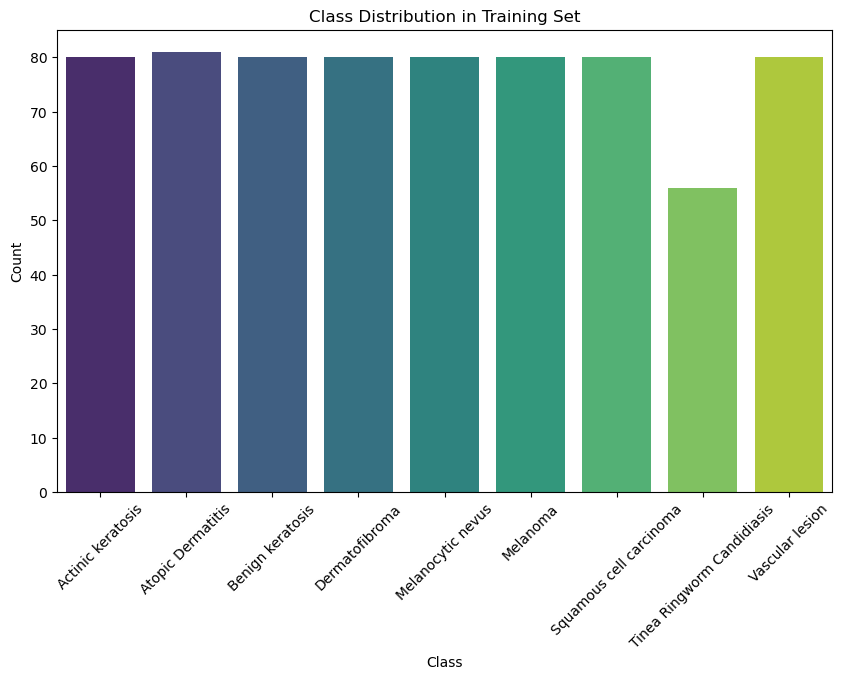

In [3]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
train_class_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in class_names}
plt.figure(figsize=(10, 6))
sns.barplot(x=list(train_class_counts.keys()), y=list(train_class_counts.values()), palette='viridis')
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

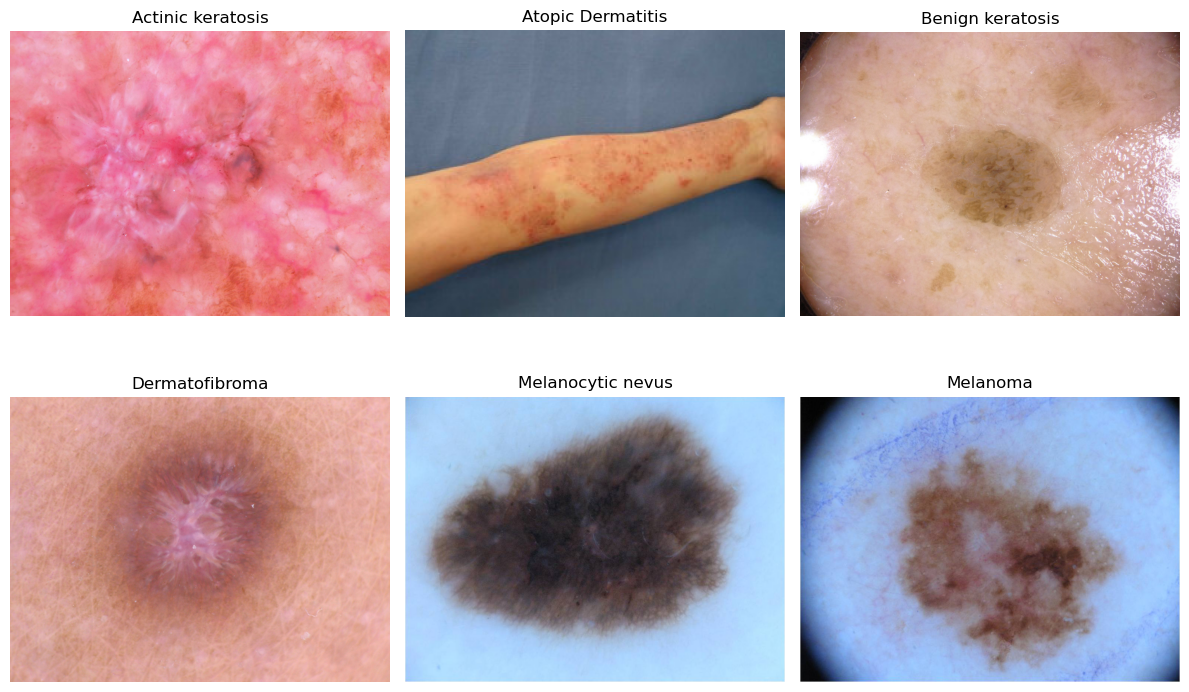

In [4]:
from matplotlib.image import imread

plt.figure(figsize=(12, 8))
for i, cls in enumerate(class_names[:6]):
    img_path = os.path.join(train_dir, cls, os.listdir(os.path.join(train_dir, cls))[0])
    img = imread(img_path)
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
val_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32
target_size = (224, 224)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 697 images belonging to 9 classes.
Found 181 images belonging to 9 classes.


In [9]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
num_classes = len(class_names)
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         9,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,046,729 (26.88 MB)

 Trainable params: 6,963,081 (26.56 MB)

 Non-trainable params: 83,648 (326.75 KB)

None


In [10]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * 0.5
lr_schedule = LearningRateScheduler(scheduler)
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=12,
    callbacks=[early_stop, lr_schedule]
)

c:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 246s 9s/step - accuracy: 0.3651 - loss: 2.0864 - val_accuracy: 0.1105 - val_loss: 360.3526 - learning_rate: 0.0010
Epoch 2/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 193s 9s/step - accuracy: 0.6408 - loss: 1.0528 - val_accuracy: 0.1934 - val_loss: 5.5817 - learning_rate: 0.0010
Epoch 3/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 192s 9s/step - accuracy: 0.6869 - loss: 0.8967 - val_accuracy: 0.1160 - val_loss: 14.0604 - learning_rate: 0.0010
Epoch 4/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 191s 9s/step - accuracy: 0.7128 - loss: 0.8840 - val_accuracy: 0.4088 - val_loss: 2.8575 - learning_rate: 0.0010
Epoch 5/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 740s 35s/step - accuracy: 0.7582 - loss: 0.7317 - val_accuracy: 0.3812 - val_loss: 2.9514 - learning_rate: 0.0010
Epoch 6/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 192s 9s/step - accuracy: 0.7741 - loss: 0.5681 - val_accuracy: 0.4751 - val_loss: 2.2379 - learning_rate: 5.0000e-04
Epoch 7/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 193s 9s/step - accuracy: 0.8594 - loss: 0.3792 -

In [11]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")


6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7232 - loss: 0.7953
Validation Accuracy: 73.48%


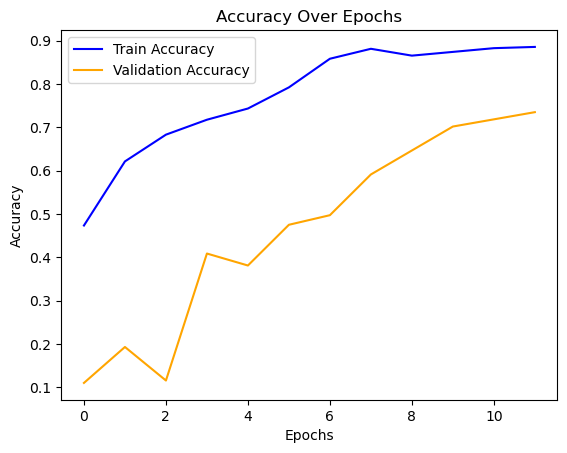

In [12]:
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()



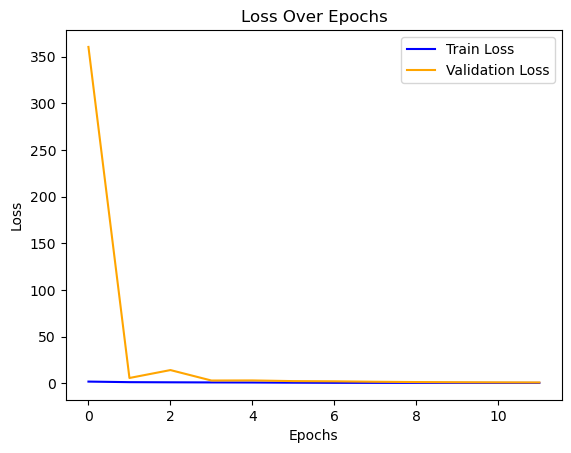

In [13]:
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.legend()
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [14]:
model.save('skin_disease_model.h5')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
import os

train_dir = "C:\\mini_project\\skin_disease_dataset\\Split_smol\\train"

# Recursively get all image paths from subdirectories
image_paths = []
for root, _, files in os.walk(train_dir):
    for file in files:
        if file.lower().endswith(('.png','.jpg','.jpeg')):
            image_paths.append(os.path.join(root,file))

# Print some paths to verify
print("Found images:",len(image_paths))
print(image_paths[:5])  # Print first 5 images


Found images: 697
['C:\\mini_project\\skin_disease_dataset\\Split_smol\\train\\Actinic keratosis\\ISIC_0024468.jpg', 'C:\\mini_project\\skin_disease_dataset\\Split_smol\\train\\Actinic keratosis\\ISIC_0024470.jpg', 'C:\\mini_project\\skin_disease_dataset\\Split_smol\\train\\Actinic keratosis\\ISIC_0024707.jpg', 'C:\\mini_project\\skin_disease_dataset\\Split_smol\\train\\Actinic keratosis\\ISIC_0024763.jpg', 'C:\\mini_project\\skin_disease_dataset\\Split_smol\\train\\Actinic keratosis\\ISIC_0024771.jpg']


In [16]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Select a valid image path from the list
if image_paths:
    image_path = image_paths[0]  # Load the first image

    # Load and preprocess the image
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Reshape for model input

    print("✅ Image loaded and preprocessed successfully.")
else:
    print("❌ No images found in the directory.")


✅ Image loaded and preprocessed successfully.


In [17]:
from tensorflow.keras.models import load_model
model = load_model('skin_disease_model.h5')
print("Model loaded successfully.")


Model loaded successfully.


In [18]:
import os

UPLOAD_FOLDER = "static/uploads"
os.makedirs(UPLOAD_FOLDER, exist_ok=True)  # Creates if not exists


In [19]:
class_names = ['Actinic keratosis', 'Atopic Dermatitis', 'Benign keratosis', 'Dermatofibroma', 'Melanocytic nevus','Melanoma','Squamous cell carcinoma','Tinea Ringworm Candidiasis', 'Vascular lesion']
import numpy as np
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]
print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class: Actinic keratosis


In [20]:
pip install flask tensorflow numpy pillow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
